In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

# all fno stocks
nifty_50_stocks = ['ABB.NS','ACC.NS','AUBANK.NS',
'AARTIIND.NS',
'ABBOTINDIA.NS',
'ADANIENT.NS',
'ADANIPORTS.NS',
'ABCAPITAL.NS',
'ABFRL.NS',
'ALKEM.NS',
'AMBUJACEM.NS',
'APOLLOHOSP.NS',
'APOLLOTYRE.NS',
'ASHOKLEY.NS',
'ASIANPAINT.NS',
'ASTRAL.NS',
'ATUL.NS',
'AUROPHARMA.NS',
'AXISBANK.NS',
'BSOFT.NS',
'BAJAJ-AUTO.NS',
'BAJFINANCE.NS',
'BAJAJFINSV.NS',
'BALKRISIND.NS',
'BALRAMCHIN.NS',
'BANDHANBNK.NS',
'BANKBARODA.NS',
'BATAINDIA.NS',
'BERGEPAINT.NS',
'BEL.NS',
'BHARATFORG.NS',
'BHEL.NS',
'BPCL.NS',
'BHARTIARTL.NS',
'BIOCON.NS',
'BOSCHLTD.NS',
'BRITANNIA.NS',
'CANFINHOME.NS',
'CANBK.NS',
'CHAMBLFERT.NS',
'CHOLAFIN.NS',
'CIPLA.NS',
'CUB.NS',
'COALINDIA.NS',
'COFORGE.NS',
'COLPAL.NS',
'CONCOR.NS',
'COROMANDEL.NS',
'CROMPTON.NS',
'CUMMINSIND.NS',
'DLF.NS',
'DABUR.NS',
'DALBHARAT.NS',
'DEEPAKNTR.NS',
'DIVISLAB.NS',
'DIXON.NS',
'LALPATHLAB.NS',
'DRREDDY.NS',
'EICHERMOT.NS',
'ESCORTS.NS',
'EXIDEIND.NS',
'GAIL.NS',
'GMRINFRA.NS',
'GLENMARK.NS',
'GODREJCP.NS',
'GODREJPROP.NS',
'GRANULES.NS',
'GRASIM.NS',
'GUJGASLTD.NS',
'GNFC.NS',
'HCLTECH.NS',
'HDFCAMC.NS',
'HDFCBANK.NS',
'HDFCLIFE.NS',
'HAVELLS.NS',
'HEROMOTOCO.NS',
'HINDALCO.NS',
'HAL.NS',
'HINDCOPPER.NS',
'HINDPETRO.NS',
'HINDUNILVR.NS',
'ICICIBANK.NS',
'ICICIGI.NS',
'ICICIPRULI.NS',
'IDFCFIRSTB.NS',
'IPCALAB.NS',
'ITC.NS',
'INDIAMART.NS',
'IEX.NS',
'IOC.NS',
'IRCTC.NS',
'IGL.NS',
'INDUSTOWER.NS',
'INDUSINDBK.NS',
'NAUKRI.NS',
'INFY.NS',
'INDIGO.NS',
'JKCEMENT.NS',
'JSWSTEEL.NS',
'JINDALSTEL.NS',
'JUBLFOOD.NS',
'KOTAKBANK.NS',
'LTF.NS',
'LTTS.NS',
'LICHSGFIN.NS',
'LTIM.NS',
'LT.NS',
'LAURUSLABS.NS',
'LUPIN.NS',
'MRF.NS',
'MGL.NS',
'M&MFIN.NS',
'M&M.NS',
'MANAPPURAM.NS',
'MARICO.NS',
'MARUTI.NS',
'MFSL.NS',
'METROPOLIS.NS',
'MPHASIS.NS',
'MCX.NS',
'MUTHOOTFIN.NS',
'NMDC.NS',
'NTPC.NS',
'NATIONALUM.NS',
'NAVINFLUOR.NS',
'NESTLEIND.NS',
'OBEROIRLTY.NS',
'ONGC.NS',
'OFSS.NS',
'PIIND.NS',
'PVRINOX.NS',
'PAGEIND.NS',
'PERSISTENT.NS',
'PETRONET.NS',
'PIDILITIND.NS',
'PEL.NS',
'POLYCAB.NS',
'PFC.NS',
'POWERGRID.NS',
'PNB.NS',
'RBLBANK.NS',
'RECLTD.NS',
'RELIANCE.NS',
'SBICARD.NS',
'SBILIFE.NS',
'SHREECEM.NS',
'SRF.NS',
'MOTHERSON.NS',
'SHRIRAMFIN.NS',
'SIEMENS.NS',
'SBIN.NS',
'SAIL.NS',
'SUNPHARMA.NS',
'SUNTV.NS',
'SYNGENE.NS',
'TATACONSUM.NS',
'TVSMOTOR.NS',
'TATACHEM.NS',
'TATACOMM.NS',
'TCS.NS',
'TATAMOTORS.NS',
'TATAPOWER.NS',
'TATASTEEL.NS',
'TECHM.NS',
'FEDERALBNK.NS',
'INDHOTEL.NS',
'RAMCOCEM.NS',
'TITAN.NS',
'TORNTPHARM.NS',
'TRENT.NS',
'UPL.NS',
'ULTRACEMCO.NS',
'UBL.NS',
'UNITDSPR.NS',
'VEDL.NS',
'IDEA.NS',
'VOLTAS.NS',
'WIPRO.NS',
'ZYDUSLIFE.NS'
]


In [ ]:
def get_stock_data(stock, period="1y"):
    return yf.download(stock, period=period)

# Function to calculate moving averages and compare with the current price
def analyze_stock(stock_df):
    stock_df['MA_200'] = stock_df['Close'].rolling(window=200).mean()
    stock_df['MA_150'] = stock_df['Close'].rolling(window=150).mean()
    stock_df['MA_50'] = stock_df['Close'].rolling(window=50).mean()
    stock_df['MA_20'] = stock_df['Close'].rolling(window=20).mean()
    stock_df['MA_5'] = stock_df['Close'].rolling(window=5).mean()

    latest_data = stock_df.iloc[-1]
    current_price = latest_data['Close']

    return {
        'Price': current_price,
        'Above_200MA': current_price > latest_data['MA_200'],
        'Above_150MA': current_price > latest_data['MA_150'],
        'Above_50MA': current_price > latest_data['MA_50'],
        'Above_20MA': current_price > latest_data['MA_20'],
        'Above_5MA': current_price > latest_data['MA_5']
    }

# Analyze stocks and show results
results = {}

for stock in nifty_50_stocks:
    stock_data = get_stock_data(stock)
    stock_analysis = analyze_stock(stock_data)
    results[stock] = stock_analysis

# Convert results into a DataFrame for better visualization
df_results = pd.DataFrame(results).T
print(df_results)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

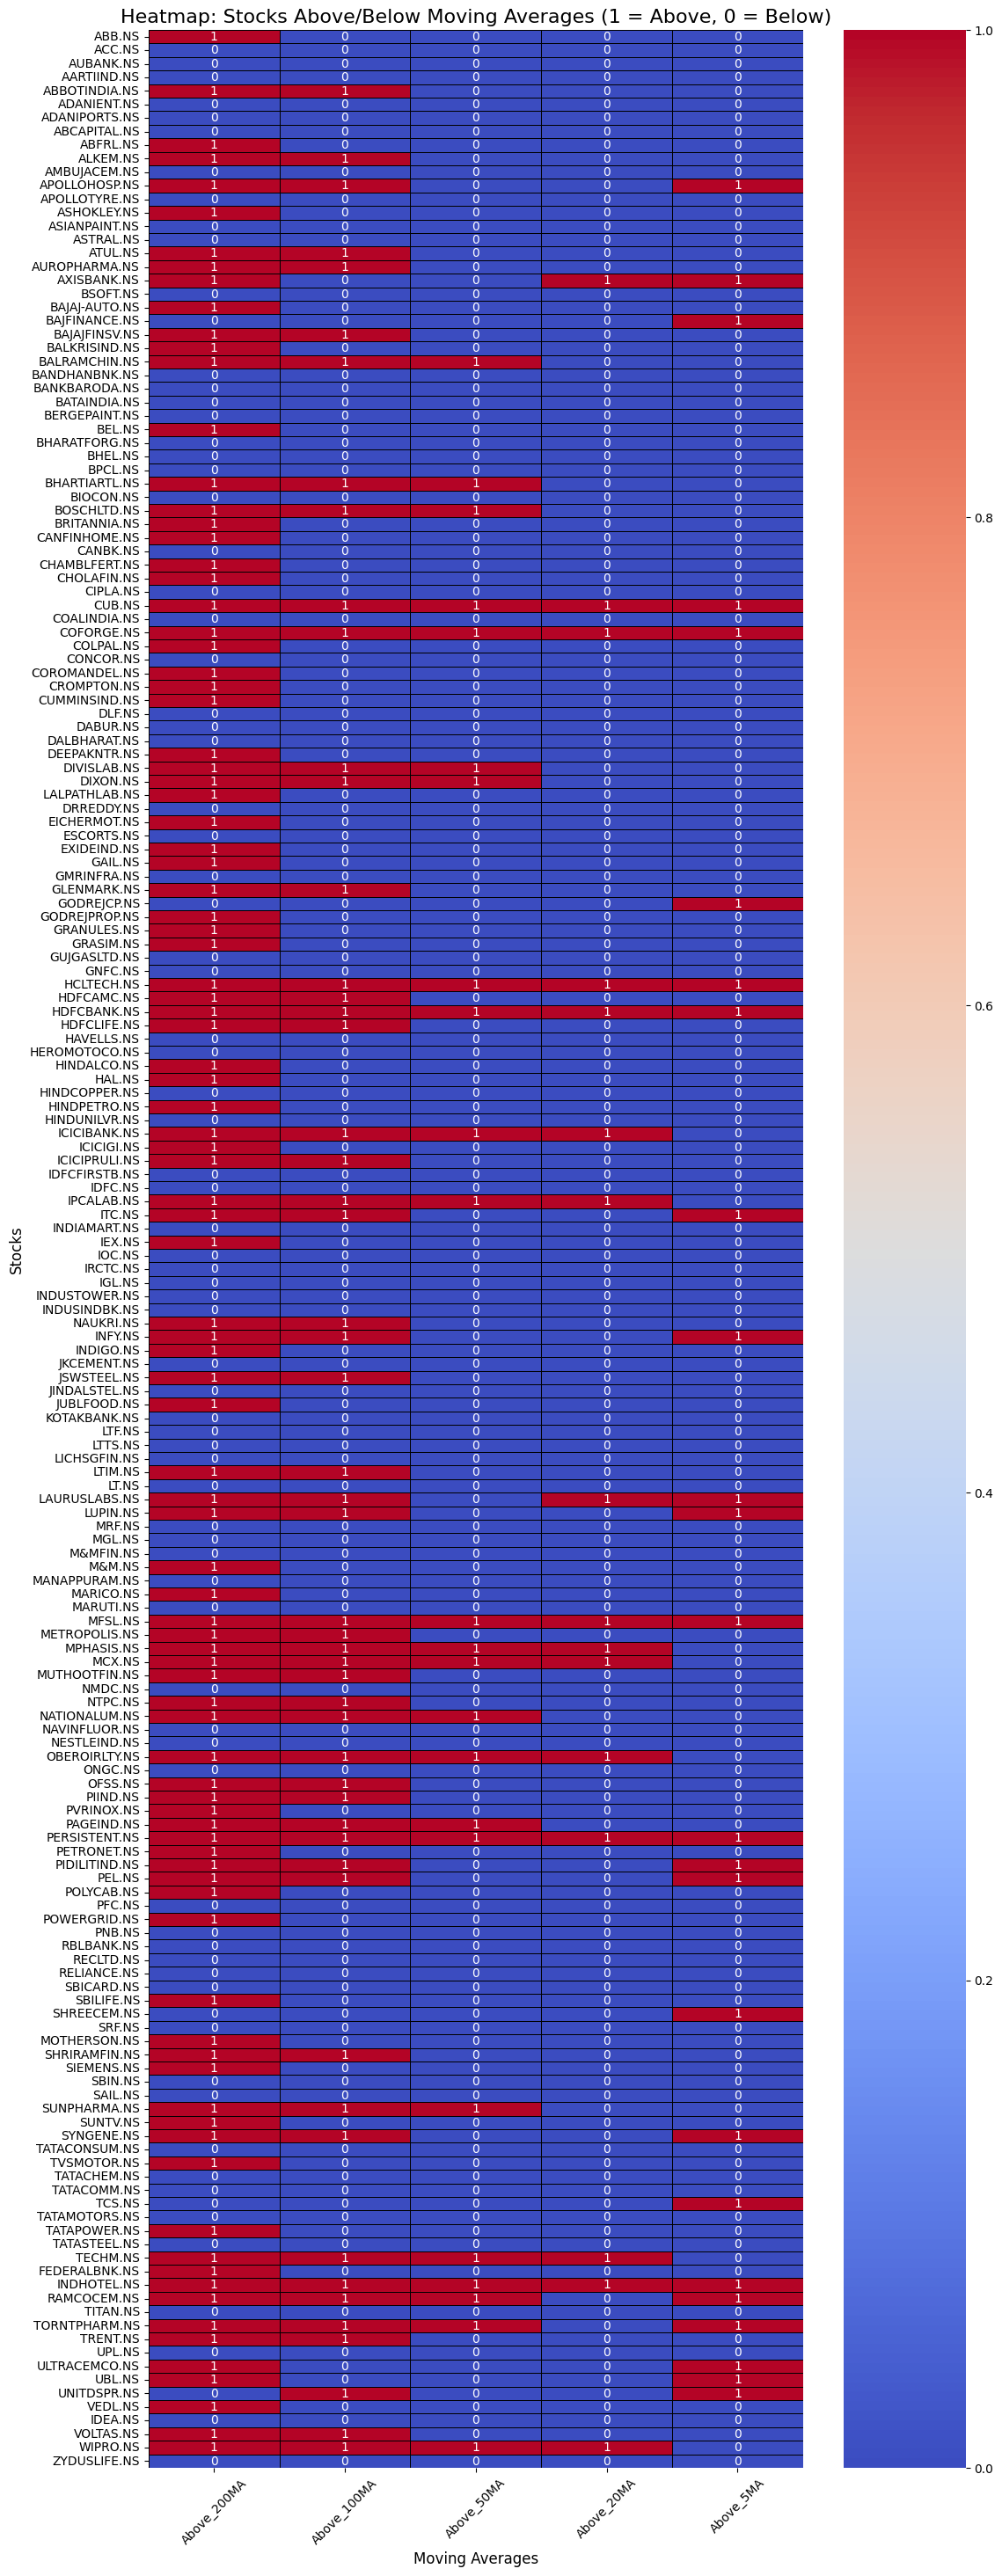

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Analyze stock moving averages
def analyze_stock(stock_df):
    stock_df['MA_200'] = stock_df['Close'].rolling(window=200).mean()
    stock_df['MA_100'] = stock_df['Close'].rolling(window=100).mean()
    stock_df['MA_50'] = stock_df['Close'].rolling(window=50).mean()
    stock_df['MA_20'] = stock_df['Close'].rolling(window=20).mean()
    stock_df['MA_5'] = stock_df['Close'].rolling(window=5).mean()

    latest_data = stock_df.iloc[-1]
    current_price = latest_data['Close']

    return {
        'Above_200MA': int(current_price > latest_data['MA_200']),
        'Above_100MA': int(current_price > latest_data['MA_100']),
        'Above_50MA': int(current_price > latest_data['MA_50']),
        'Above_20MA': int(current_price > latest_data['MA_20']),
        'Above_5MA': int(current_price > latest_data['MA_5'])
    }

# Collect results for each stock
results = {}

for stock in nifty_50_stocks:
    stock_data = get_stock_data(stock)
    stock_analysis = analyze_stock(stock_data)
    results[stock] = stock_analysis

# Convert results into a DataFrame
df_results = pd.DataFrame(results).T

# Create a heatmap for Above/Below moving averages (1 = above, 0 = below)
plt.figure(figsize=(12, 36))
sns.heatmap(df_results, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Heatmap: Stocks Above/Below Moving Averages (1 = Above, 0 = Below)', fontsize=16)
plt.xlabel('Moving Averages', fontsize=12)
plt.ylabel('Stocks', fontsize=12)
plt.xticks(rotation=45)
plt.show()